In [16]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [9]:
#Reading CSV files
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")
true.head()
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
#Specifying fake and real
fake['target'] = 'fake'
true['target'] = 'true'
#News dataset
news = pd.concat([fake, true]).reset_index(drop = True)
news.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [11]:
#Train-test split
x_train,x_test,y_train,y_test = train_test_split(news['text'], news.target, test_size=0.2, random_state=1)

Accuracy of Logistic Regression Classifier: 98.73%

Confusion Matrix of Logistic Regression Classifier:

[[4617   65]
 [  49 4249]]


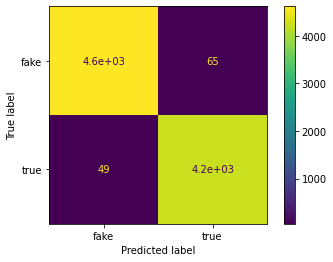


CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4682
        true       0.98      0.99      0.99      4298

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [13]:

#Logistic regression classification
pipe1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LogisticRegression())])

model_lr = pipe1.fit(x_train, y_train)
lr_pred = model_lr.predict(x_test)

print("Accuracy of Logistic Regression Classifier: {}%".format(round(accuracy_score(y_test, lr_pred)*100,2)))
print("\nConfusion Matrix of Logistic Regression Classifier:\n")
print(confusion_matrix(y_test,lr_pred))
plot_confusion_matrix(model_lr, x_test, y_test)  
plt.show()
print("\nCLassification Report of Logistic Regression Classifier:\n")
print(classification_report(y_test, lr_pred))


In [17]:
cross_val_score(model_lr, x_test, y_test, cv=10, scoring = 'accuracy').mean()


0.9763919821826281

Accuracy of SVM Classifier: 99.39%

Confusion Matrix of SVM Classifier:

[[4644   38]
 [  17 4281]]


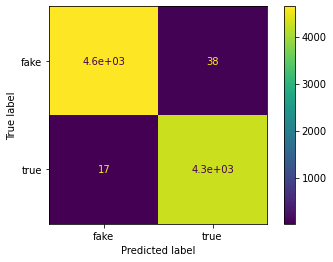


Classification Report of SVM Classifier:

              precision    recall  f1-score   support

        fake       1.00      0.99      0.99      4682
        true       0.99      1.00      0.99      4298

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [18]:
#Support Vector classification
pipe2 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LinearSVC())])

model_svc = pipe2.fit(x_train, y_train)
svc_pred = model_svc.predict(x_test)

print("Accuracy of SVM Classifier: {}%".format(round(accuracy_score(y_test, svc_pred)*100,2)))
print("\nConfusion Matrix of SVM Classifier:\n")
print(confusion_matrix(y_test, svc_pred))
plot_confusion_matrix(model_svc, x_test, y_test)  
plt.show()
print("\nClassification Report of SVM Classifier:\n")
print(classification_report(y_test, svc_pred))

In [19]:
cross_val_score(model_svc, x_test, y_test, cv=10, scoring = 'accuracy').mean()

0.9868596881959911

Accuracy of Naive Bayes Classifier: 94.08%

Confusion Matrix of Naive Bayes Classifier:

[[4450  232]
 [ 300 3998]]


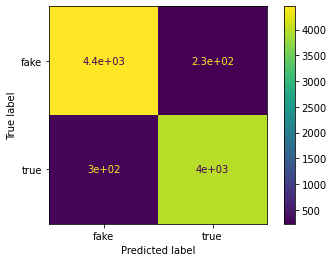


Classification Report of Naive Bayes Classifier:

              precision    recall  f1-score   support

        fake       0.94      0.95      0.94      4682
        true       0.95      0.93      0.94      4298

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [20]:
#Naive-Bayes classification
pipe3 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

model_nb = pipe3.fit(x_train, y_train)
nb_pred = model_nb.predict(x_test)

print("Accuracy of Naive Bayes Classifier: {}%".format(round(accuracy_score(y_test, nb_pred)*100,2)))
print("\nConfusion Matrix of Naive Bayes Classifier:\n")
print(confusion_matrix(y_test, nb_pred))
plot_confusion_matrix(model_nb, x_test, y_test)  
plt.show()
print("\nClassification Report of Naive Bayes Classifier:\n")
print(classification_report(y_test, nb_pred))


In [21]:
cross_val_score(model_nb, x_test, y_test, cv=10, scoring = 'accuracy').mean()

0.9369710467706012